**MAIN**

Below code is the mathematical exploration of the research questions as posed in this repo's README.md. The main research questions are:

**Research Questions 1: Do people managers make more money than single contributer**\
**Research Questions 2: Does working experience determine salary**\
**Research Questions 3: Do people managers make more money than single contributer, irrespective of their working experience**

**Business Understanding**

The problem at hand is the decision that (young) developers need to make about their career. Some of them want to or need to make a consious decision on whether they want to continue developing as an individual contributer or make a switch to management. To make this decision,  more insight into their finanancial perspectives whilst progressing their career and potentially make a switch to management can add value.

**initialisation**

Importing packages and general settings

In [66]:
# importing packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.special import erfinv
import scipy.stats

In [67]:
# general settings

sns.set(rc={'figure.figsize':(7,7)})

functions

In [68]:
# define mean confidence interval

def mean_confidence_interval(data, confidence=0.95):
    '''
    returns a confidence interal of the population mean, given a sample
    in : data sample, desired confidence treshold
    out: confidence interval of population mean
    '''
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

Methods; In this methods we compare and correlate parameters. For that, we use population mean confidence intervals and correlation analysis with significance treshold calculations. These methods are simple in nature but fit-for-purpose for the quickscan in this notebook

**gather**

In [69]:
# import survey results csv from data folder

survey_results = pd.read_csv('data/survey_results_public.csv')

**Asses data**

Missing value analysis. We see that +/- 50% of all values are missing for out columns of interest. In this analysis, we will unbiased missing values and won't input due to plenty of data. confidence intervals will be considered throughout code.

In [70]:
survey_results.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [71]:
# % missing values of columns of interest

survey_results[['CompFreq','CompTotal','WorkExp','ICorPM']].isnull().sum()/len(survey_results)*100

CompFreq     39.366436
CompTotal    47.559644
WorkExp      49.815745
ICorPM       50.479063
dtype: float64

We see that for our targeted parameters, almost 50% is nan. This calls for appropriate handling of nans

CompFreq
CompTotal
WorkExp
ICorPM


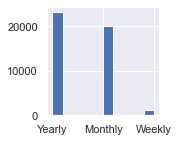

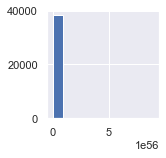

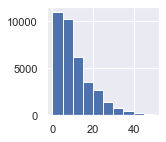

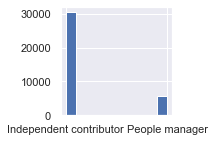

In [72]:
for i in ['CompFreq','CompTotal','WorkExp','ICorPM']:
    print(i)
    plt.figure(figsize=(2,2))
    survey_results[i].hist()

We see that CompTotal histogram is dominated by outliers. This calls for appropriate outlier handling

In [73]:
for i in ['CompFreq','CompTotal','WorkExp','ICorPM']:
    print(survey_results[i].describe())

count      44425
unique         3
top       Yearly
freq       23267
Name: CompFreq, dtype: object
count    3.842200e+04
mean     2.342434e+52
std      4.591478e+54
min      0.000000e+00
25%      3.000000e+04
50%      7.750000e+04
75%      1.540000e+05
max      9.000000e+56
Name: CompTotal, dtype: float64
count    36769.000000
mean        10.242378
std          8.706850
min          0.000000
25%          4.000000
50%          8.000000
75%         15.000000
max         50.000000
Name: WorkExp, dtype: float64
count                       36283
unique                          2
top       Independent contributor
freq                        30592
Name: ICorPM, dtype: object


We see the maximum CompFrew is 9E56, which is an unrealistic value. This calls for filtering for realistic values

**Clean/Prepare**

In [74]:
# create yearly salary column and filter away values that are not realistic

survey_results['YearlySal'] = ''

for i, row in survey_results.iterrows():
    if survey_results['CompFreq'].iloc[i] == 'Yearly':
        survey_results['YearlySal'].iloc[i] = survey_results['CompTotal'].iloc[i]
    elif survey_results['CompFreq'].iloc[i] == 'Monthly':
        survey_results['YearlySal'].iloc[i] = survey_results['CompTotal'].iloc[i] * 12
    elif survey_results['CompFreq'].iloc[i] == 'Weekly':
        survey_results['YearlySal'].iloc[i] = survey_results['CompTotal'].iloc[i] * 52
    else:
        survey_results['YearlySal'].iloc[i] = np.nan

C:\Users\N9DCE~1.ORI\AppData\Local\Temp/ipykernel_18648/1959762815.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_results['YearlySal'].iloc[i] = np.nan
C:\Users\N9DCE~1.ORI\AppData\Local\Temp/ipykernel_18648/1959762815.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_results['YearlySal'].iloc[i] = survey_results['CompTotal'].iloc[i]
C:\Users\N9DCE~1.ORI\AppData\Local\Temp/ipykernel_18648/1959762815.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [75]:
# filtering unrealistic values (less than 10 or higher then 10mill)

survey_results[survey_results['YearlySal']>1000000] = np.nan
survey_results[survey_results['YearlySal']<10] = np.nan

C:\Users\n.orie\AppData\Roaming\Python\Python39\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\n.orie\AppData\Roaming\Python\Python39\site-packages\numpy\lib\histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([16483.,  8977.,  2456.,  1072.,   960.,   957.,   513.,   592.,
          445.,   382.]),
 array([1.00000e+01, 1.00009e+05, 2.00008e+05, 3.00007e+05, 4.00006e+05,
        5.00005e+05, 6.00004e+05, 7.00003e+05, 8.00002e+05, 9.00001e+05,
        1.00000e+06]),
 <BarContainer object of 10 artists>)

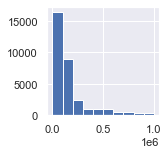

In [76]:
# plot historgram of yearly salary to obtain insight in data distribution

plt.figure(figsize=(2,2))
plt.hist(survey_results['YearlySal'])

**Research Questions 1: Do people managers make more money than single contributer**

**Analyze/Visualize**

In [77]:
# get subsets of data where ICorPM is 'people manager' or 'independent contributor'

survey_results_PM = survey_results[survey_results['ICorPM']=='People manager']
survey_results_IC = survey_results[survey_results['ICorPM']=='Independent contributor']

c:\Users\n.orie\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


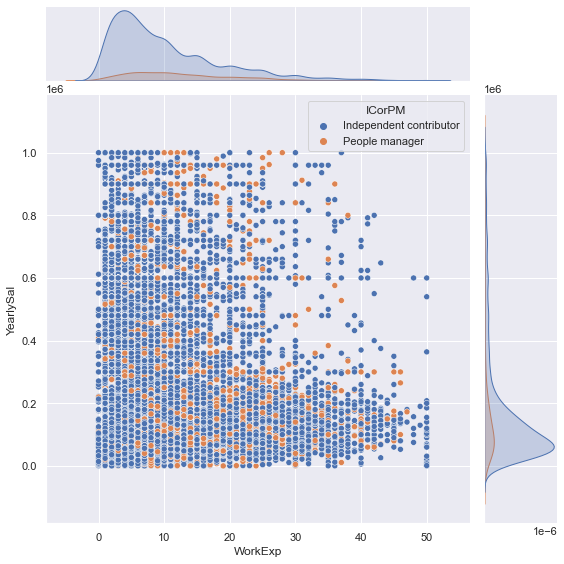

In [78]:
# plot work experience vs yearly salary for ICorPM groups

x = 'WorkExp'
y = 'YearlySal'

sns.jointplot(x ,y,
              data = survey_results,
              dropna = True, hue='ICorPM', height=8)


Comparing means. Below cells compare the average value and confidence interval of population mean of yearly salary of the two ICorPM groups.

In [79]:
# check average salary for both ICorPM groups

print(np.nanmean(survey_results_PM['YearlySal']))
print(np.nanmean(survey_results_IC['YearlySal']))

185872.65621193667
175656.05474095797


In [80]:
mean_confidence_interval(survey_results_PM['YearlySal'].dropna(), confidence=0.95)

(185872.65621193667, 178893.80926056355, 192851.5031633098)

In [81]:
mean_confidence_interval(survey_results_IC['YearlySal'].dropna(), confidence=0.95)

(175656.05474095797, 172838.49365303133, 178473.61582888462)

We see that 95% confidence intervals of the means of 'PM' group and 'IC' group do not overlap.

**Research Questions 2: Does working experience determine salary**

**Analyze/Visualize**

Comparing means. Below cells compare the average value and confidence interval of population mean of work experience of the two ICorPM groups. It then checks the significance of the correlation between work experience and yearly salary.

In [82]:
# mean of work experience for PM's and IC's

print(np.nanmean(survey_results_PM['WorkExp']))
print(np.nanmean(survey_results_IC['WorkExp']))


12.867557715674362
9.902176343444884


In [83]:
mean_confidence_interval(survey_results_PM['WorkExp'].dropna(), confidence=0.95)

(12.867557715674362, 12.622494105678326, 13.112621325670398)

In [84]:
mean_confidence_interval(survey_results_IC['WorkExp'].dropna(), confidence=0.95)

(9.902176343444884, 9.797623175625983, 10.006729511263785)

In [85]:
survey_filtered = survey_results[['YearlySal', 'WorkExp']]
survey_filtered = survey_filtered.dropna()

In [86]:
# correlation between yearly salary and work experience

np.corrcoef(survey_filtered['YearlySal'].astype(float), survey_filtered['WorkExp'].astype(float))

array([[1.        , 0.01059229],
       [0.01059229, 1.        ]])

In [87]:
conf_bound = np.sqrt(2)*erfinv(0.95)/(0.5*np.sqrt(len(survey_filtered)))
conf_bound

0.02580240480474293

We can see that the confidence interval for work experience (PM vs IC) do not overlap. The correlation coeffienct for yearly salary and work experience does not exceed the significance treshold.

Text(0.5, 0.05, "WorkExperience distribution for IC's and PM's")

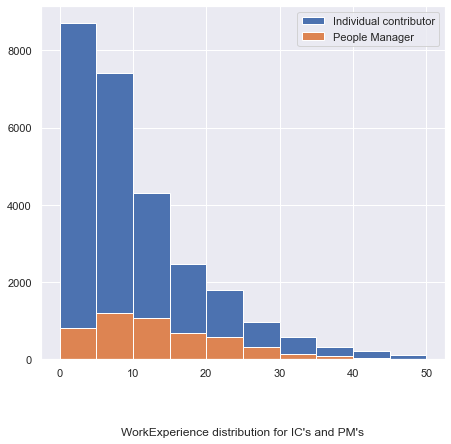

In [117]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt="WorkExperience distribution for IC's and PM's"
ax1.hist(survey_results_IC['WorkExp'], label='Individual contributor')
ax1.hist(survey_results_PM['WorkExp'], label='People Manager')
ax1.legend()
fig.text(.5, .05, txt, ha='center')

**Research Questions 3: Do people managers make more money than single contributer, irrespective of their working experience**

Exploration

**Asses/Clean**

<AxesSubplot: xlabel='WorkExp', ylabel='YearlySal'>

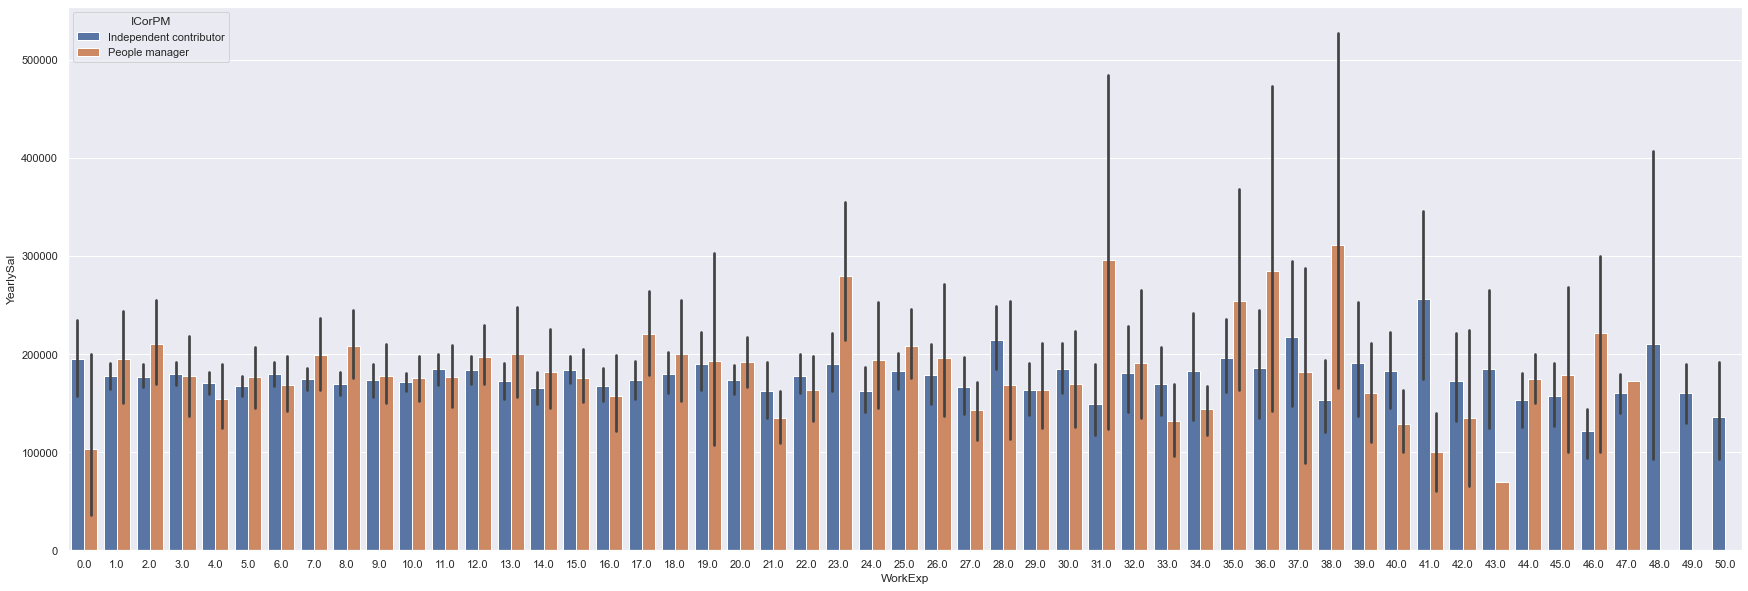

In [88]:
# plot average yearly salary per work experience for people managers and independent contributors

sns.set(rc={'figure.figsize':(30,10)})

sns.barplot(data=survey_results
            , x='WorkExp'
            , y="YearlySal"
            , hue="ICorPM")

**Analyze/Visualize**

Analysis. In the following cells, we'll compute the average yearly salary for IC's and PM's for all different work experiences. We will later compare the differences per work experience

In [89]:
# create list of average yearly salary per work experience for people managers and independent contributors

average_IC = []
average_PM = []

for i in range(int(np.max(survey_results['WorkExp']))):
    avg = np.nanmean(survey_results_IC[survey_results_IC['WorkExp']==i]['YearlySal'])
    average_IC.append(avg)

for i in range(int(np.max(survey_results['WorkExp']))):
    avg = np.nanmean(survey_results_PM[survey_results_PM['WorkExp']==i]['YearlySal'])
    average_PM.append(avg)

average_PM = [x for x in average_PM if str(x) != 'nan']

np.average(np.nanmean(average_PM)/(average_IC))

C:\Users\N9DCE~1.ORI\AppData\Local\Temp/ipykernel_18648/2556123454.py:11: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(survey_results_PM[survey_results_PM['WorkExp']==i]['YearlySal'])


1.0447084986921438

(array([ 2.,  2.,  1.,  4., 19., 10.,  7.,  1.,  1.,  1.]),
 array([-157969.57142857, -126519.25064935,  -95068.92987013,
         -63618.60909091,  -32168.28831169,    -717.96753247,
          30732.35324675,   62182.67402597,   93632.99480519,
         125083.31558442,  156533.63636364]),
 <BarContainer object of 10 artists>)

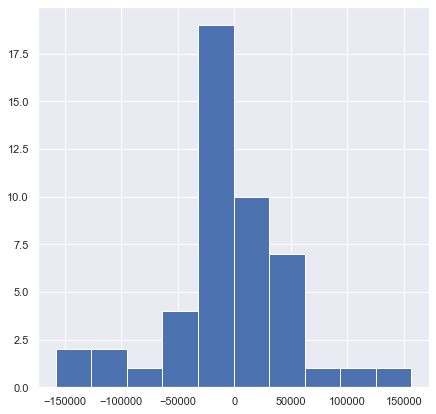

In [90]:
# difference between IC average vs PM average

sns.set(rc={'figure.figsize':(7,7)})

difference = np.array(average_IC)[0:48] - np.array(average_PM)[0:48]
plt.hist(difference)

In [91]:
# difference vector population mean confidence interval, this sees whether salaries are on average significantly higher/lower over the different work experiences for the two ICorPM groups

mean_confidence_interval(difference, confidence=0.95)

(-6075.866417280122, -22292.847975838045, 10141.115141277802)

**Conclusions**

**Research Questions 1: Do people managers make more money than single contributer**

True: significant difference in PM's and IC's mean yearly salary

**Research Questions 2: Does working experience determine salary**

False: no significant correlation between working experience and salary

**Research Questions 3: Do people managers make more money than single contributer, irrespective of their working experience**

False: no significant difference between salaries of PM's and IC's within the same work experience group